## Make necessary imports

In [1]:
from __future__ import division, print_function, absolute_import

In [2]:
import tflearn
from tflearn.data_utils import shuffle, to_categorical
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation

In [3]:
import sys, time
import numpy as np
sys.path.insert(0, '../')
import pandas as pd

In [4]:
import tensorflow as tf
from library.datasets import cifar10
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from library.utils import file_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from library.plot_tools import plot
import sklearn.metrics as skm

In [5]:
exp_no = 3 #ex3 is final exp
file_no = 201
dataset = 'cifar10'
train_epochs = 100
tensorboard_verbose = 3
one_hot = True
make_image = True
mode='rgb_float'

In [6]:
output_directory = '../logs/cifar10/' + str(file_no).zfill(3) + '_tfl_cnn/' + 'exp_no_' + str(exp_no).zfill(3) + '/'
file_utils.mkdir_p(output_directory)
ck_path = output_directory + 'model.tfl.ckpt'
log_file = output_directory + 'tflearn_cnn_classifier.ckpt'
model_output_path = output_directory + 'model.tflearn'
print('Writing tensorboard logs to %s' % log_file)
print('view logs by running tensorboard: ', end='')
print('\"tensorboard --logdir=\'./201_tf_cnn/\' --port 61111\"')

Writing tensorboard logs to ../logs/cifar10/201_tfl_cnn/exp_no_003/tflearn_cnn_classifier.ckpt
view logs by running tensorboard: "tensorboard --logdir='./201_tf_cnn/' --port 61111"


In [7]:
total_time = 0

## Step 1.1: Load CIFAR 10 Dataset

In [8]:
cifar10_dataset = cifar10.CIFAR10(one_hot_encode=one_hot, num_images=1.0, image_mode=mode,
                                  train_validate_split=None, endian='little')
cifar10_dataset.load_data(train=True, test=True, data_directory='./datasets/cifar10/')

Loading CIFAR 10 Dataset
MD5sum of the file: ./datasets/cifar10/cifar-10.tar.gz is verified
Loading 50000 train images
Loading CIFAR 10 Training Dataset
Reading unpicked data file: ./datasets/cifar10/cifar-10-batches/data_batch_1
Reading unpicked data file: ./datasets/cifar10/cifar-10-batches/data_batch_2
Reading unpicked data file: ./datasets/cifar10/cifar-10-batches/data_batch_3
Reading unpicked data file: ./datasets/cifar10/cifar-10-batches/data_batch_4
Reading unpicked data file: ./datasets/cifar10/cifar-10-batches/data_batch_5
Loading 10000 test images
Loading CIFAR 10 Test Dataset
Unpickling test file: ./datasets/cifar10/cifar-10-batches/test_batch
Reading unpicked test file: ./datasets/cifar10/cifar-10-batches/test_batch
Loaded CIFAR 10 Dataset in 3.4178 seconds


True

## Step 1.2: Make test train split

In [9]:
X = cifar10_dataset.train.images
Y = cifar10_dataset.train.one_hot_labels
X_test = cifar10_dataset.test.images
Y_test = cifar10_dataset.test.one_hot_labels
X_train, X_validate, Y_train, Y_validate = train_test_split(X, Y, test_size=0.2, random_state=1)

## Step 1.3: Print image shapes

In [10]:
print('Train data shape        :', X.shape)
print('Train labels shape      :', Y.shape)
print('Validation data shape   :', X_validate.shape)
print('Validation labels shape :', Y_validate.shape)
print('Test data shape         :', X_test.shape)
print('Test labels shape       :', Y_test.shape)

Train data shape        : (50000, 32, 32, 3)
Train labels shape      : (50000, 10)
Validation data shape   : (10000, 32, 32, 3)
Validation labels shape : (10000, 10)
Test data shape         : (10000, 32, 32, 3)
Test labels shape       : (10000, 10)


## Step 1.4 Display train and test images


Plotting CIFAR 10 Train Dataset


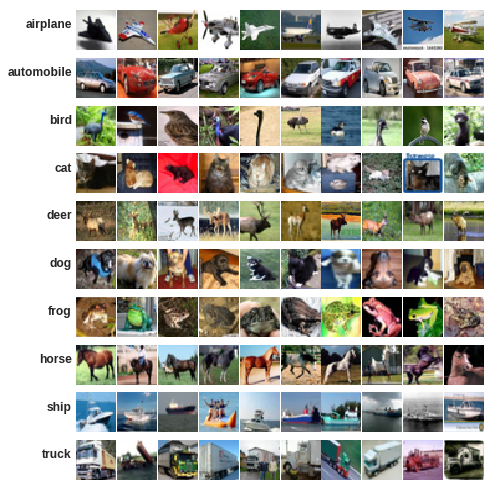

Plotting CIFAR 10 Test Dataset


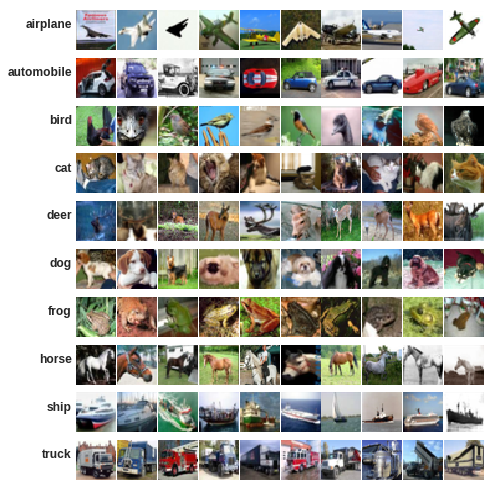

In [11]:
cifar10_dataset.plot_sample(plot_data=True, plot_test=True, fig_size=(7, 7))

## Step 1.5 Display train images with labels

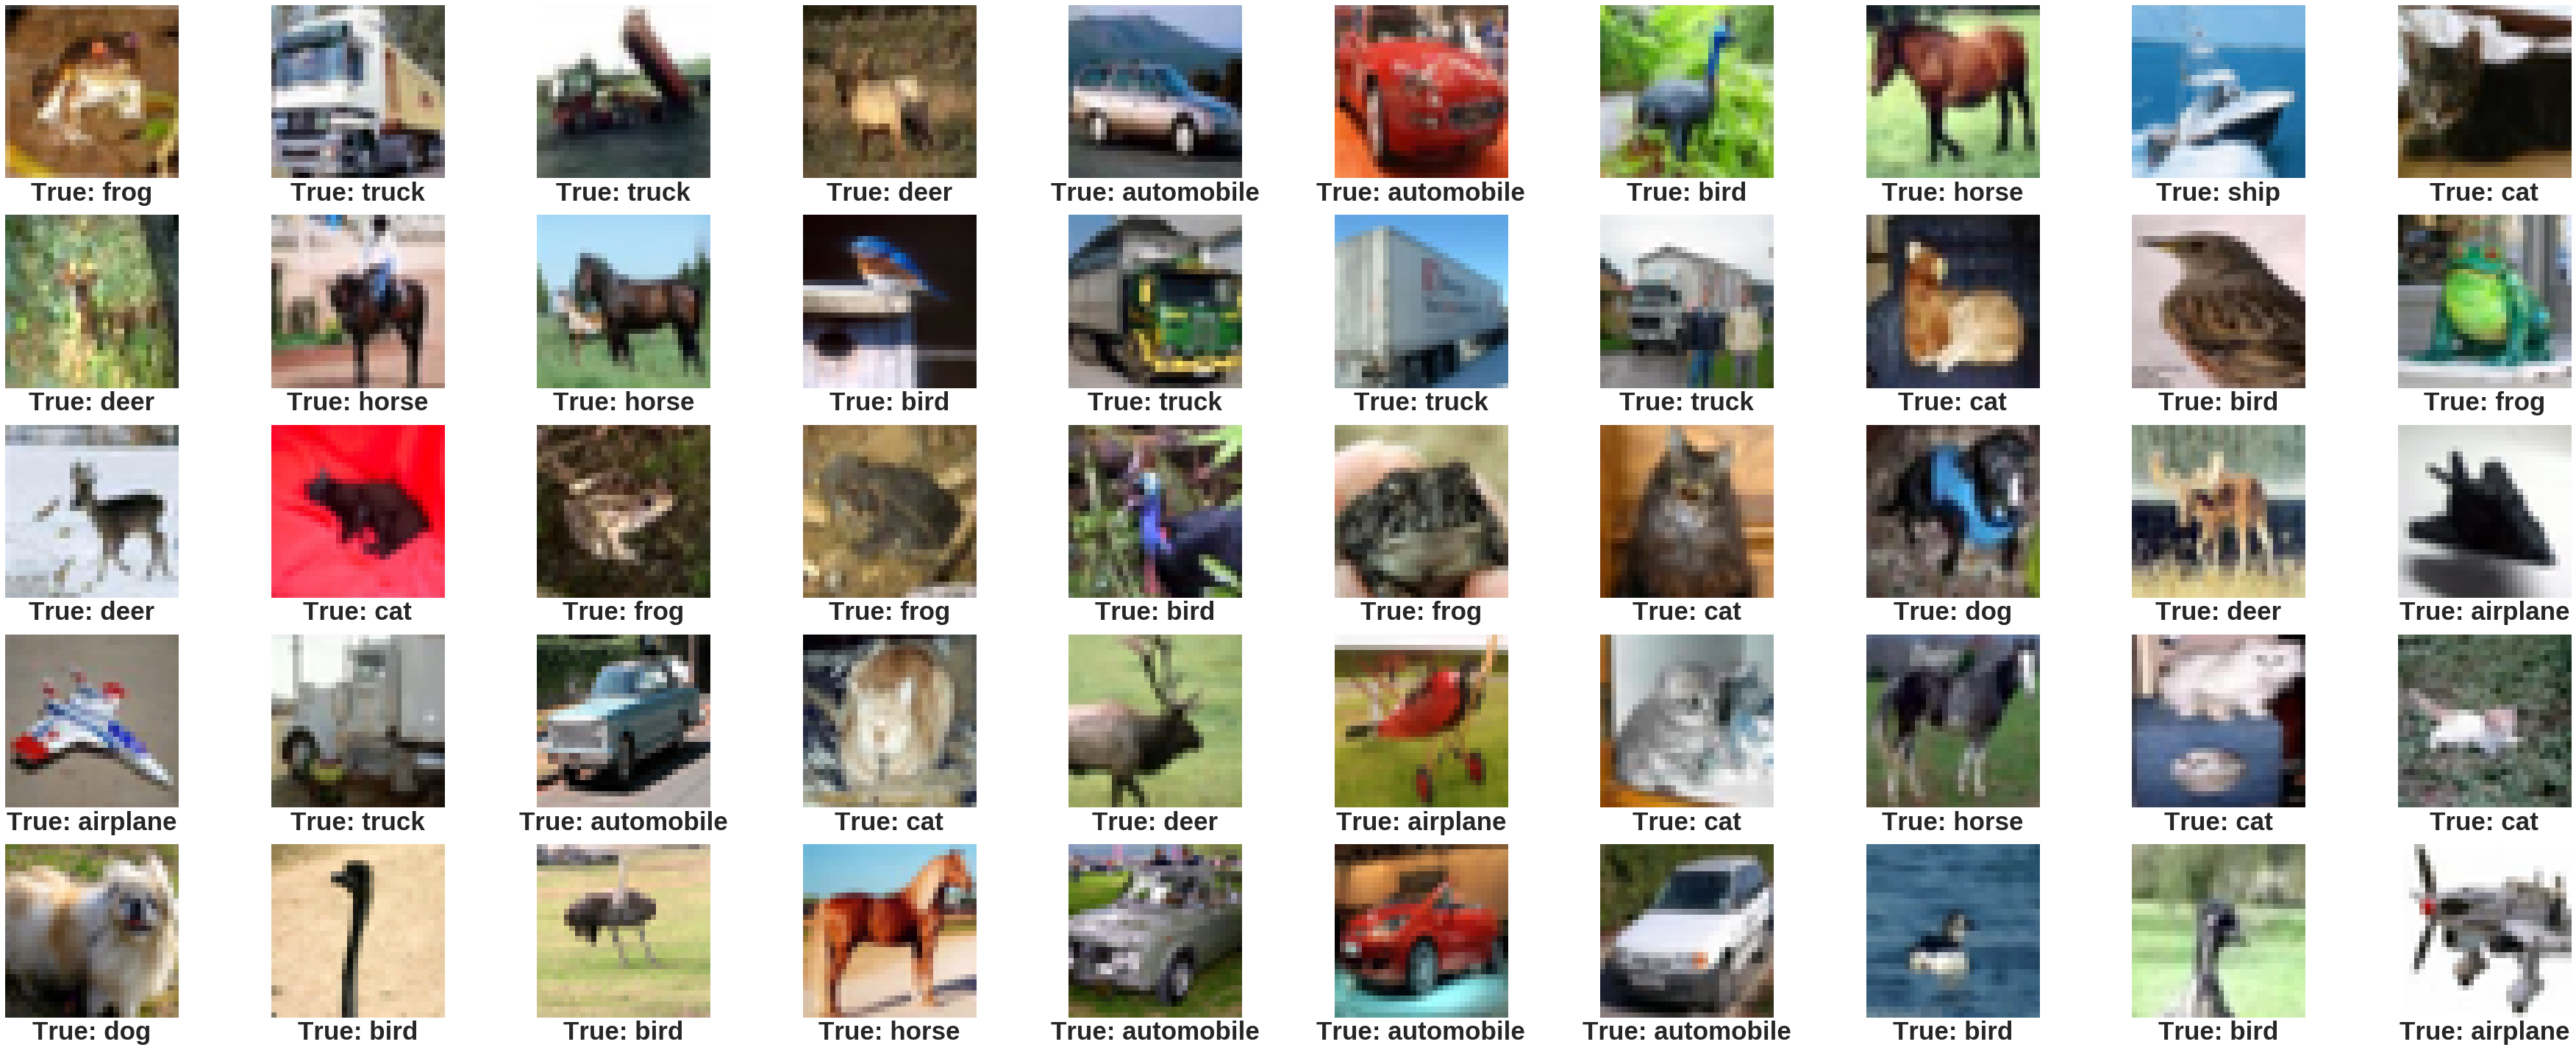

True

In [12]:
 cifar10_dataset.plot_images(cifar10_dataset.train.data[:50, :], cifar10_dataset.train.class_names[:50], 
                             nrows=5, ncols=10, fig_size=(20,50), fontsize=35, convert=True)

## Step 1.6 Image augmentation and processing

In [13]:
# Real-time data preprocessing
img_prep = ImagePreprocessing()
img_prep.add_featurewise_zero_center()
img_prep.add_featurewise_stdnorm()

In [14]:
# Real-time data augmentation
img_aug = ImageAugmentation()
img_aug.add_random_flip_leftright()
img_aug.add_random_rotation(max_angle=25.)

In [15]:
#img_aug.add_random_crop([32, 32], padding=4)

In [16]:
network = input_data(shape=[None, 32, 32, 3], data_preprocessing=img_prep, data_augmentation=img_aug)

## Step 2: Model Convolutional Neural network

In [17]:
# accuracy== 0.80589
# network = conv_2d(network, 32, 3, activation='relu')
# network = max_pool_2d(network, 2)
# network = conv_2d(network, 128, 3, activation='relu')
# network = max_pool_2d(network, 2)
# network = conv_2d(network, 512, 3, activation='relu')
# network = max_pool_2d(network, 2)
# network = fully_connected(network, 1024, activation='relu')
# network = dropout(network, 0.5)
# network = fully_connected(network, 10, activation='softmax')
# network = regression(network, optimizer='adam',
#                      loss='categorical_crossentropy',
#                      learning_rate=0.001)


#################################################################
# accuracy == 0.79359999999999997

network = conv_2d(network, 32, 3, activation='relu')
network = max_pool_2d(network, 2)
network = conv_2d(network, 64, 3, activation='relu')
network = max_pool_2d(network, 2)
network = conv_2d(network, 128, 3, activation='relu')
network = max_pool_2d(network, 2)
network = conv_2d(network, 256, 3, activation='relu')
network = max_pool_2d(network, 2)
network = conv_2d(network, 512, 3, activation='relu')
network = max_pool_2d(network, 2)
network = fully_connected(network, 1024, activation='relu')
network = dropout(network, 0.5)
network = fully_connected(network, 2048, activation='relu')
network = dropout(network, 0.5)
network = fully_connected(network, 10, activation='softmax')
network = regression(network, optimizer='adam',
                     loss='categorical_crossentropy',
                     learning_rate=0.001)


##################################################################

#ex3==0.81089999999999995   itern 100 without crop

# # iteration 5 without crop 0.73309999999999997
# # iteration 5 with crop 0.76
# network = conv_2d(network, 32, 3, activation='relu')
# network = max_pool_2d(network, 2)
# network = conv_2d(network, 64, 3, activation='relu')
# network = conv_2d(network, 64, 3, activation='relu')
# network = max_pool_2d(network, 2)
# network = fully_connected(network, 512, activation='relu')
# network = dropout(network, 0.5)
# network = fully_connected(network, 10, activation='softmax')
# network = regression(network, optimizer='adam',
#                       loss='categorical_crossentropy',
#                       learning_rate=0.001)

In [18]:
start = time.time()
model = tflearn.DNN(network, tensorboard_verbose=tensorboard_verbose,
                    tensorboard_dir=log_file,checkpoint_path=ck_path)
model.fit(X_train, Y_train, n_epoch=train_epochs, 
          shuffle=True,snapshot_epoch=True, validation_set=(X_validate, Y_validate),
          show_metric=True, batch_size=96, run_id='cifar10_cnn')
end = time.time()
print('Model fit done in %s seconds' %(end-start))

Training Step: 41699  | total loss: 0.38891 | time: 66.848s
| Adam | epoch: 100 | loss: 0.38891 - acc: 0.8922 -- iter: 39936/40000
Training Step: 41700  | total loss: 0.38316 | time: 68.299s
| Adam | epoch: 100 | loss: 0.38316 - acc: 0.8926 | val_loss: 0.74601 - val_acc: 0.7915 -- iter: 40000/40000
--
INFO:tensorflow:/net/voxel03/misc/me/praneethas/PycharmProjects/object-recognition/logs/cifar10/201_tfl_cnn/exp_no_003/model.tfl.ckpt-41700 is not in all_model_checkpoint_paths. Manually adding it.
Model fit done in 6963.029168128967 seconds


## Step 3 : Write the obtained Model to file

In [19]:
test_accuracy = model.evaluate(cifar10_dataset.test.images, cifar10_dataset.test.one_hot_labels)

In [20]:
print('Test accuracy:', test_accuracy)

Test accuracy: [0.78610000000000002]


In [21]:
model.save(model_output_path)

INFO:tensorflow:/net/voxel03/misc/me/praneethas/PycharmProjects/object-recognition/logs/cifar10/201_tfl_cnn/exp_no_003/model.tflearn is not in all_model_checkpoint_paths. Manually adding it.


## Step 4 : Validation dataset

Labels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Confusion matrix, without normalization
[[775  13  34  19  17   7   6  15  81  19]
 [  5 882   1   4   0   1   6   0  23  64]
 [ 44   3 733  40  79  28  60  26  18   7]
 [ 20   3  58 616  71  99  60  35  20   7]
 [ 10   3  48  28 795  12  28  77   6   0]
 [  2   4  44 169  52 640  26  49   3   6]
 [  4  10  39  33  44  13 828   6   6   4]
 [ 21   3  27  19  36  29   2 865   3   7]
 [ 16  13   9   2   3   1   6   2 915  11]
 [ 20  56   9  20   4   2   0   8  37 866]]
Normalized confusion matrix
[[ 0.78600406  0.01318458  0.03448276  0.01926978  0.01724138  0.00709939
   0.00608519  0.01521298  0.0821501   0.01926978]
 [ 0.00507099  0.89452333  0.0010142   0.0040568   0.          0.0010142
   0.00608519  0.          0.02332657  0.06490872]
 [ 0.04238921  0.00289017  0.7061657   0.03853565  0.0761079   0.02697495
   0.05780347  0.02504817  0.01734104  0.00674374]
 [ 0.02022245  0.00303337  0.0586451   0.62285137  0.07178969  0.10010111
   0.06066734 

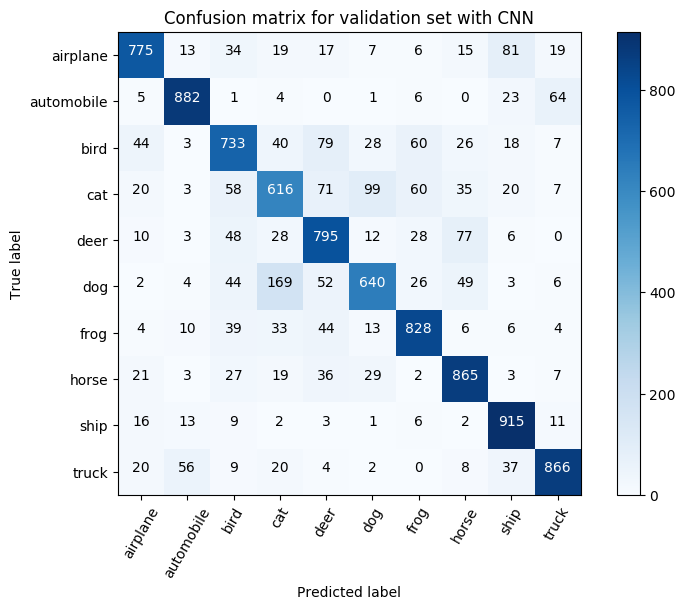

In [22]:
y_predict_raw = model.predict(X_validate)
y_predict = np.argmax(y_predict_raw, axis=1, out=None)
y_val = np.argmax(Y_validate, axis=1, out=None)
labels = sorted(list(set(cifar10_dataset.train.class_labels)))
print('Labels: ' + str(labels))
plot.plot_confusion_matrix(y_val,y_predict, classes=cifar10_dataset.classes, fig_size=(8,6),
                              normalize=True, title='Confusion matrix for validation set with CNN')

In [23]:
start = time.time()
print('Classification report:')
print(skm.classification_report(y_val, y_predict, target_names=cifar10_dataset.classes))
validate_accuracy = skm.accuracy_score(y_val, y_predict, normalize=True)
print('Validation accuracy score: ' + str(validate_accuracy))
end = time.time()
print('[ Step 4] Generating classification on validation dataset in %.6f ms' % ((end-start)*1000))
total_time += (end-start)

Classification report:
             precision    recall  f1-score   support

   airplane       0.85      0.79      0.81       986
 automobile       0.89      0.89      0.89       986
       bird       0.73      0.71      0.72      1038
        cat       0.65      0.62      0.64       989
       deer       0.72      0.79      0.75      1007
        dog       0.77      0.64      0.70       995
       frog       0.81      0.84      0.82       987
      horse       0.80      0.85      0.83      1012
       ship       0.82      0.94      0.88       978
      truck       0.87      0.85      0.86      1022

avg / total       0.79      0.79      0.79     10000

Validation accuracy score: 0.7915
[ Step 4] Generating classification on validation dataset in 6.943941 ms


## Step 5 : Test dataset

In [24]:
y_predict_raw = model.predict(X_test)
y_predict = np.argmax(y_predict_raw, axis=1, out=None)
y_val = np.argmax(Y_test, axis=1, out=None)

In [25]:
prediction_numbers = y_predict
prediction_classes = []
num_test_images = cifar10_dataset.test.images.shape[0]
for i in range(num_test_images):
    prediction_classes.append(cifar10_dataset.classes[int(prediction_numbers[i])])

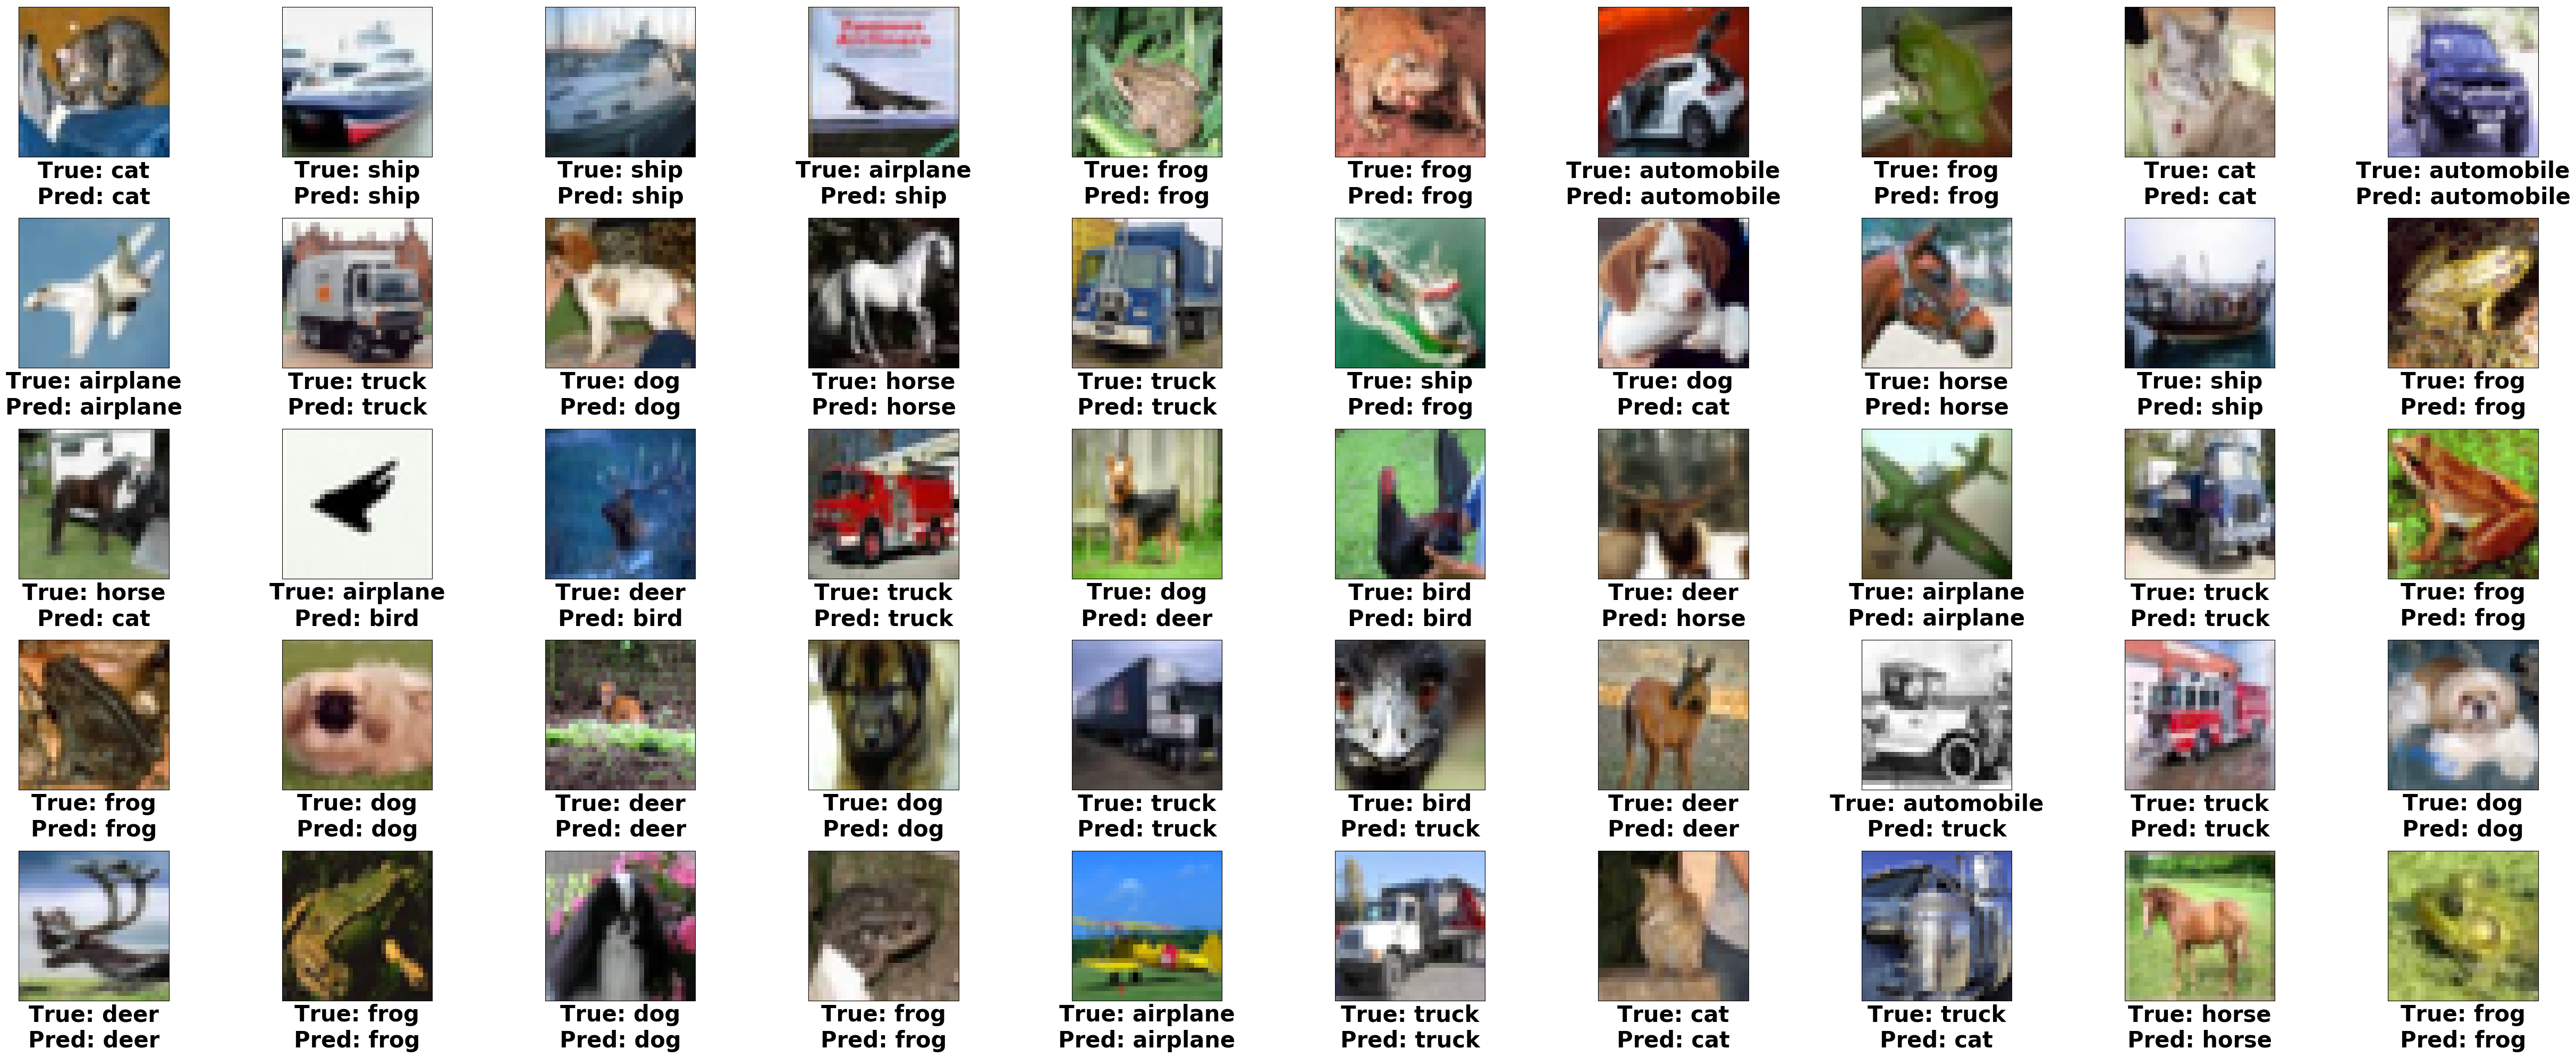

True

In [26]:
cifar10_dataset.plot_images(cifar10_dataset.test.images[:50], cifar10_dataset.test.class_names[:50], cls_pred=prediction_classes[:50], 
                    nrows=5, ncols=10, fig_size=(20,50), fontsize=30, convert=False)

Labels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Confusion matrix, without normalization
[[785  17  30  12  16   4   5  10 105  16]
 [ 10 897   3   4   0   3   4   2  17  60]
 [ 49   8 702  44  72  26  47  37  11   4]
 [ 22   6  61 594  81 100  68  39  16  13]
 [ 12   2  52  41 801  10  22  51   9   0]
 [ 14   6  38 173  46 644  18  48   9   4]
 [  9   4  35  34  45  15 834  12  10   2]
 [ 13   0  24  33  38  19   6 858   4   5]
 [ 26  16   9  13   1   1   5   1 917  11]
 [ 22  60  10  10   3   3   8  13  42 829]]
Normalized confusion matrix
[[ 0.785  0.017  0.03   0.012  0.016  0.004  0.005  0.01   0.105  0.016]
 [ 0.01   0.897  0.003  0.004  0.     0.003  0.004  0.002  0.017  0.06 ]
 [ 0.049  0.008  0.702  0.044  0.072  0.026  0.047  0.037  0.011  0.004]
 [ 0.022  0.006  0.061  0.594  0.081  0.1    0.068  0.039  0.016  0.013]
 [ 0.012  0.002  0.052  0.041  0.801  0.01   0.022  0.051  0.009  0.   ]
 [ 0.014  0.006  0.038  0.173  0.046  0.644  0.018  0.048  0.009  0.004]
 [ 0.009  0.004  0.035  

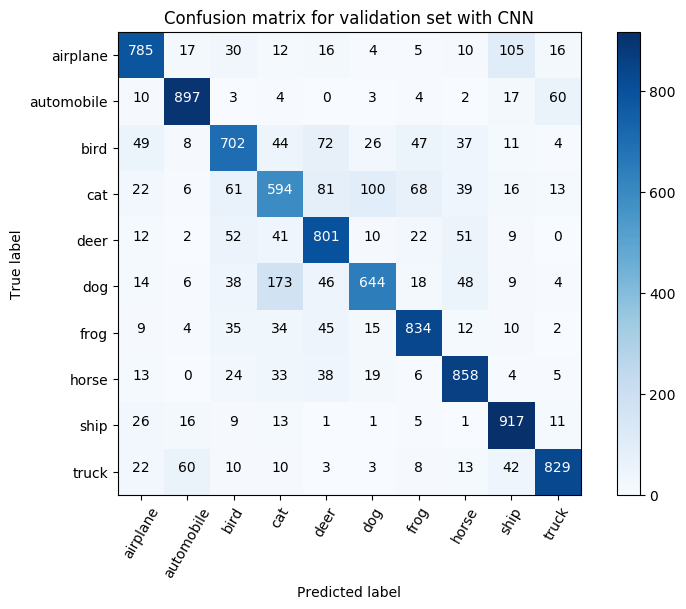

In [27]:
labels = sorted(list(set(cifar10_dataset.train.class_labels)))
print('Labels: ' + str(labels))
plot.plot_confusion_matrix(y_val, y_predict, classes=cifar10_dataset.classes, fig_size=(8,6),
                           normalize=True, title='Confusion matrix for validation set with CNN')

In [28]:
start = time.time()
print('Classification report:')
print(skm.classification_report(y_val, y_predict, target_names=cifar10_dataset.classes))
validate_accuracy = skm.accuracy_score(y_val, y_predict, normalize=True)
print('Test accuracy score: ' + str(validate_accuracy))
end = time.time()
print('[ Step 5] Generating classification on validation dataset in %.6f ms' %((end-start)*1000))
total_time += (end-start)

Classification report:
             precision    recall  f1-score   support

   airplane       0.82      0.79      0.80      1000
 automobile       0.88      0.90      0.89      1000
       bird       0.73      0.70      0.71      1000
        cat       0.62      0.59      0.61      1000
       deer       0.73      0.80      0.76      1000
        dog       0.78      0.64      0.71      1000
       frog       0.82      0.83      0.83      1000
      horse       0.80      0.86      0.83      1000
       ship       0.80      0.92      0.86      1000
      truck       0.88      0.83      0.85      1000

avg / total       0.79      0.79      0.78     10000

Test accuracy score: 0.7861
[ Step 5] Generating classification on validation dataset in 6.553888 ms


## Step 6 : Write the predictions to CSV file

In [29]:
start = time.time()
indices = np.arange(1, len(Y_test)+1)
predictions = np.column_stack((indices, y_val))
output_csv_file = output_directory + str(exp_no).zfill(3) + '.csv'
column_names = ['id', 'label']
predict_test_df = pd.DataFrame(data=predictions, columns=column_names)
predict_test_df.to_csv(output_csv_file, index=False)
end = time.time()
print('[ Step 11] Writing the test data to file: %s in %.6f ms' %(output_csv_file, (end-start)*1000))
total_time += (end-start)

[ Step 11] Writing the test data to file: ../logs/cifar10/201_tfl_cnn/exp_no_003/003.csv in 35.822153 ms


## Step 7 : Write the notebook to HTML file

In [30]:
def output_HTML(read_file, output_file):
    from nbconvert import HTMLExporter
    import codecs
    import nbformat
    exporter = HTMLExporter()
    output_notebook = nbformat.read(read_file, as_version=4)
    print()
    output, resources = exporter.from_notebook_node(output_notebook)
    codecs.open(output_file, 'w', encoding='utf-8').write(output)

In [34]:
%%javascript
var notebook = IPython.notebook
notebook.save_notebook()

<IPython.core.display.Javascript object>

In [35]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [36]:
current_file = './' + theNotebook + '.ipynb'
output_file = output_directory + str(file_no).zfill(3) + '_exp_no_' + str(exp_no).zfill(3) + '_' + theNotebook + '.html'
print('Current file: ' + str(current_file))
print('Output file: ' + str(output_file))
file_utils.mkdir_p(output_directory) 
output_HTML(current_file, output_file)

Current file: ./201_tfl_CNN_Raw_features_CIFAR_10.ipynb
Output file: ../logs/cifar10/201_tfl_cnn/exp_no_003/201_exp_no_003_201_tfl_CNN_Raw_features_CIFAR_10.html

